Skripta napravljena prateći Complete Guide on Time Series Analysis in Python by PRASHANT BANERJEE from Kaggle i dodatni izvori za detaljno pojašnjavanje pojedinih pojmova

Tags: Python · Air Passengers, Time Series Analysis Dataset

# Učitaj pakete

In [12]:
import pandas as pd #for importing data, data processing
import numpy as np #linear algebra
import matplotlib as mpl
import matplotlib.pyplot as plt #for data visualization
import seaborn #for statistical data visualization


# Učitaj podatke i prikaži 

Pripazi na ucitavanje podataka jer moraju biti ili dvostruko napisani \\ ili okreni na drugu stranu pa stavi samo jednu /.

In [11]:
data=pd.read_csv('C:\\Users\\mgojevic\\Downloads\\archive\\AirPassengers.csv')


### 1. nacin za prikaz

In [8]:
print(data)

       Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]


### 2. nacin za prikaz

In [129]:
data.head()

,Date,Number of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


##### Uredi imena kolona i lijepi prikaz 

In [127]:
data.columns = ['Date','Number of Passengers']

data.head()

,Date,Number of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


# Vizualizacija podataka koristenjem matplotlib.pyplot


### 1. Vizualizacija obična

In [54]:
def plot_data(data, x, y, title="", ylabel='Broj putnika', xlabel='Datum'):
    
    plt.figure(figsize=(16,5), dpi=100)   #dpi=kakva je rezolucija slike figsize=njene dimenzije
    
    plt.plot(x, y, color='green')  #za extra neke nijanse mogu korstiti i tab:green ->dohvaca boje iz Tableaua
    
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel) #namjesti nazive koordinatnih osi i naslova grafa
    #gca nam sluzi kako bismo dohvatili trenutnu figuru koju kreiramo i njene koordinatne osi
    
    plt.show() #prikazi graf
    

    

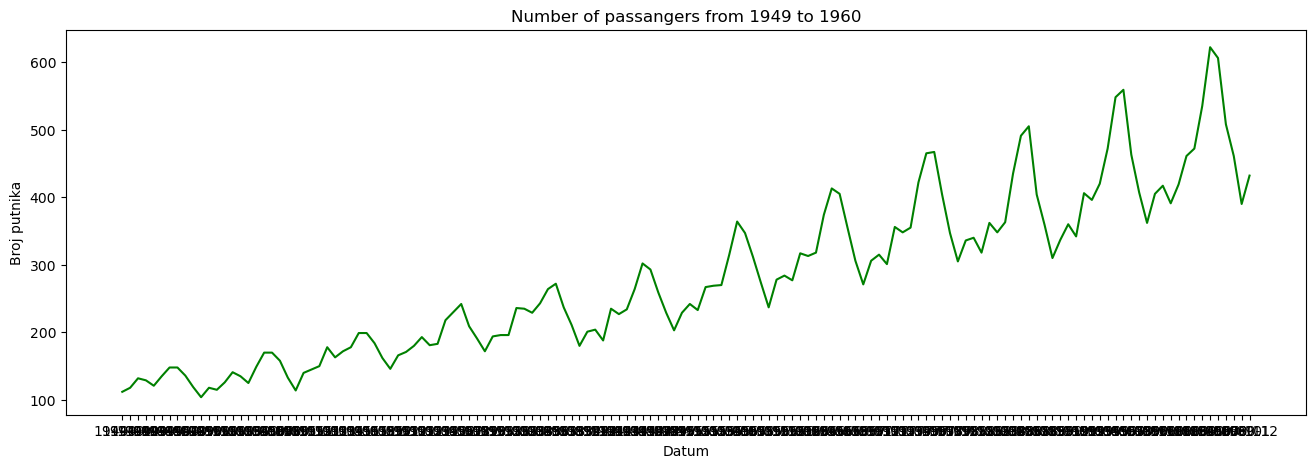

In [41]:
plot_data(data, x=data['Date'], y=data['Number of Passengers'], title='Number of passangers from 1949 to 1960')

### 2. Vizualizacija s naglaskom na prikaz porasta/smanjenja promjene

In [57]:
x = data['Date'].values
y1 = data['Number of Passengers'].values

Kreiramo prikaz

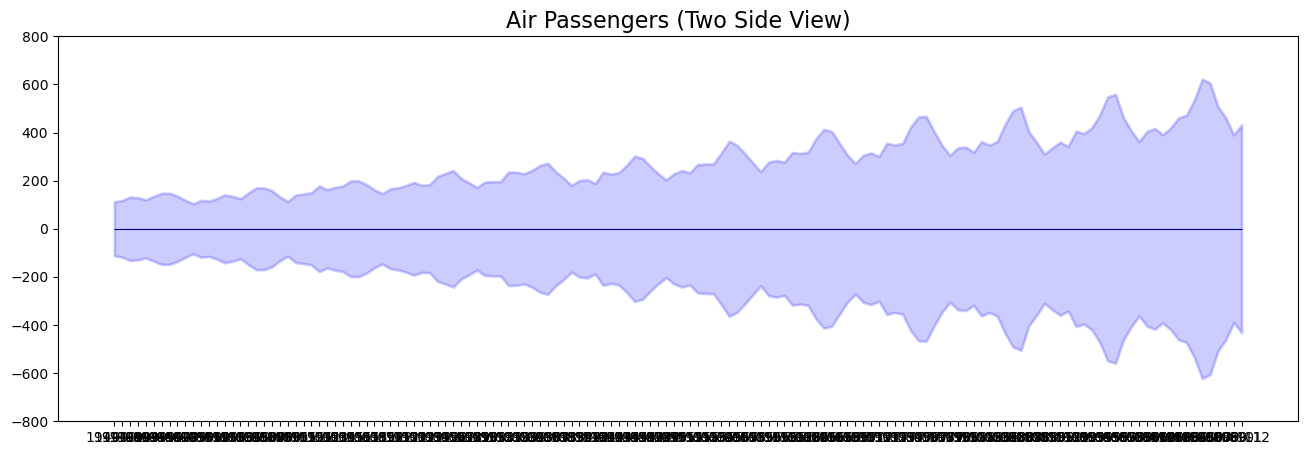

In [84]:

#fig oznacava da radimo figuru tj.objekt nacrtat ce nam koordinatni sustav

ax = plt.subplots(1, 1, figsize=(16,5), dpi= 100)
#radilo bi nam i bez ovog reda, ali ne bi bilo dobro formatirano
#imenujem s ax iako to nije potrebno 

plt.fill_between(x, y1=y1, y2=-y1, alpha=0.2, linewidth=2, color='blue')
#bojanje međuprostora
#alpha predstavlja prozirnost 

plt.ylim(-800, 800)
#gornja i donja granica na grafu

plt.title('Air Passengers (Two Side View)', fontsize=16)

plt.hlines(y=0, xmin=np.min(data['Date']), xmax=np.max(data['Date']), linewidth=.8, color='darkblue')
#y na kojoj visina , xmin i xmax od kud to kud interval 

plt.show()  
#prikazi -> kada ne bi bilo ovog reda onda nam se ne bi izvrsilo kao gotov task 
#vec samo privremeno prikazao



# Komponente vremenskih nizova - trend, sezonalnost, cickličnost, slučajnost (šum)

### Definicija i razlike 

Vizualizacija vremenskih nizova sastoji se od: osnovnog prikaza kao u prethodnom poglavlju + neka od komponenti: trend, sezonalnost, cikličnost, šum (slučajna greška).


1. Trend - predstavlja promjenu u smislu porasta/pada kroz velik vremenski period...npr. nekoliko godina



2. Sezonalnost     - predstavlja kratkoročni period kretanja koji se ponavlja u pravilnim jednakotrajucim vremenskim periodima...npr. prodaja sladoleda u godini..zimi je slaba, ljeti je super



3. Cikličnost  - ponavljanje nekog stanja neovisnog o vremenskoj komponenti nego npr. o odluci bussinessa



4. Šum(Slučajnost) - javlja se određena nepredviđena promjena u podacima zbog nepredvidivih okolnosti...npr. tornado i broj smrtnih slučajeva 

#### Napomene!

1. Vremenski niz ne mora imati zadovoljene sve komponente, može imati samo neku.

2. Potrebno je pripaziti da ne dođe do miješanja sezonske i cikličke komponente. Ciklička komponenta ne ovisi o pravilnom vremenskom razmaku, samo se oblik krivulje ponavlja. Javlja se u situaciji koja ne mora biti vezana za vrijeme vec za neke druge parametre. Npr. Nekakve odluke na poslu za provođenje projekta. Projekti se svi odrađuju na isti način samo u vremenskim intervalima s razlicitim trajanjem. Sezonska komponenta je vezana za fiksno vrijeme ponavljanja i trajanja određene etape koja se ponavlja.


3. Stohastički ili slučajni trend znači da trend vremenskog niza nije konstantan i predvidljiv, već se ponaša kao slučajan proces. To znači da vrijednosti niza nisu usmjerene ili vođene nekim stabilnim uzorkom ili obrascom, već se kreću nasumično i bez jasne orijentacije.

### Vrste vremenskih nizova 

Budući da postoje različiti trendovi i različite sezonalnosti postoje onda i različiti vremenski nizovi s obzirom na kombinaciju te dvije komponente.

1. Additive time series:
Value = Base Level + Trend + Seasonality + Error


2. Multiplicative Time Series:
Value = Base Level x Trend x Seasonality x Error

# Dekompozicija vremenskih nizova

Dekompozicija služi kako bi napravila podjelu aditivnih/multiplikativnih vremenskih nizova na njihove komponente.

In [92]:
#učitavanje paketa za dekompoziciju

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

#### 1. Dekompozicija i prikaz aditivnog vremenskog niza

In [106]:
decopm_additive = seasonal_decompose(data['Number of Passengers'], model='additive', period=30)

In [123]:
#namjestamo defaultnu velicinu slike

plt.rcParams.update({'figure.figsize': (12,10)})


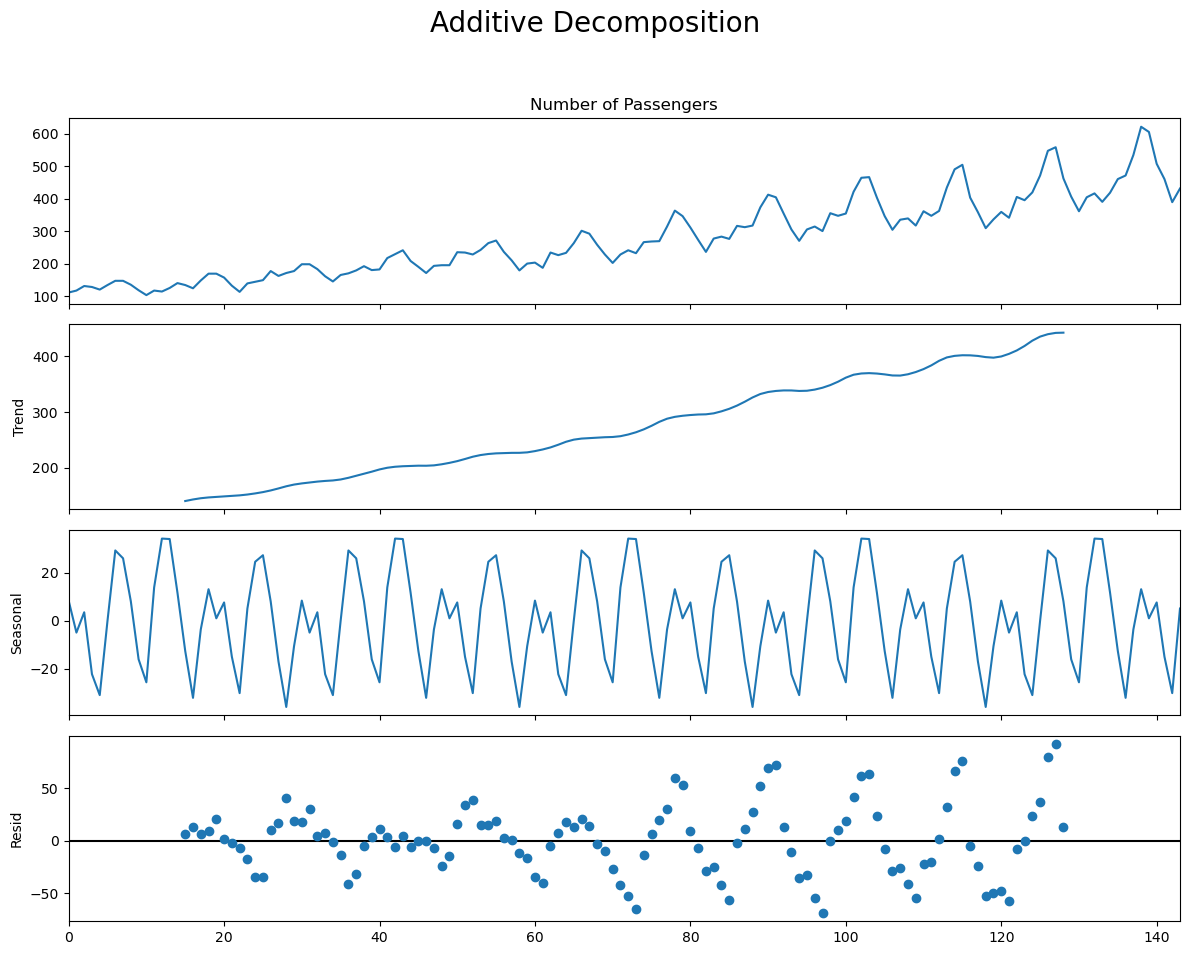

In [124]:
decopm_additive.plot().suptitle('Additive Decomposition', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

#### 2. Dekompozicija i prikaz multiplikativnog vremenskog niza

In [109]:
decopm_multi = seasonal_decompose(data['Number of Passengers'], model='multiplicative', period=30)

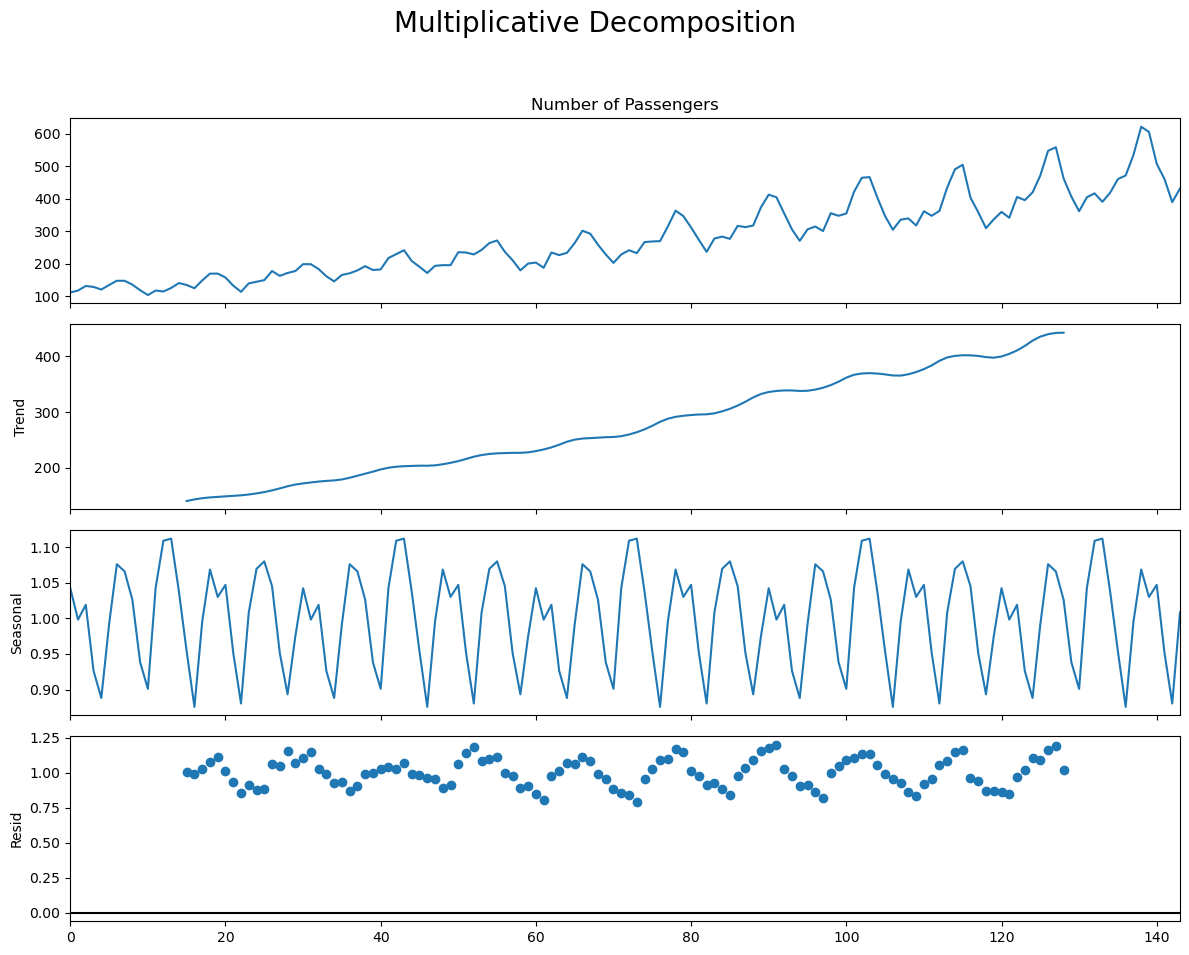

In [125]:
decopm_multi.plot().suptitle('Multiplicative Decomposition', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

# Stacionarnost vremenskih nizova 

Sjetimo se definicije: Vremenski niz je niz podataka određene varijable praćene kroz pravilno raspoređene vremenske intervale.

Mean (očekivanje grč.math= mi) je aritmetička sredina opaženih vrijednosti. Drugim riječima, suma svih podataka opažene varijable naspram ukupnog broja podataka tj. u ovom slučaju koliko vremenskih perioda ima.

Stacionarnost je svojstvo da se tijekom povećavanja seta podataka s novim vremenskim intervalima očekivanje (mean) ne mijenja nego je konstanta vrijednost. Ukoliko dođe do promjene očekivanja stacionarnost se ruši i vremenski niz vise nije stacionaran.

#### Dodatne definicije:

Variance (varijanca grč.math= sigma^2) je kvocijent sume kvadrata (opažena vrijednost - očekivanje) i ukupnog broja opaženih vrijednosti (u ovom slučaju broj vremenskih perioda)

Korelacija je svojstvo koje iskazuje u kakvom su zavisnom odnosu dvije varijable. Raspon korelacije je [-1,1].

Autokorelacija je svojstvo koje iskazuje u kakvom je odnosu varijabla naspram iste sebe u skladu s prethodnim vremenskim periodom. 

Stacionarnost zahtjeva da se također varijanca i autokorelacija ne mijenjaju tijekom vremena.

Primjeri:

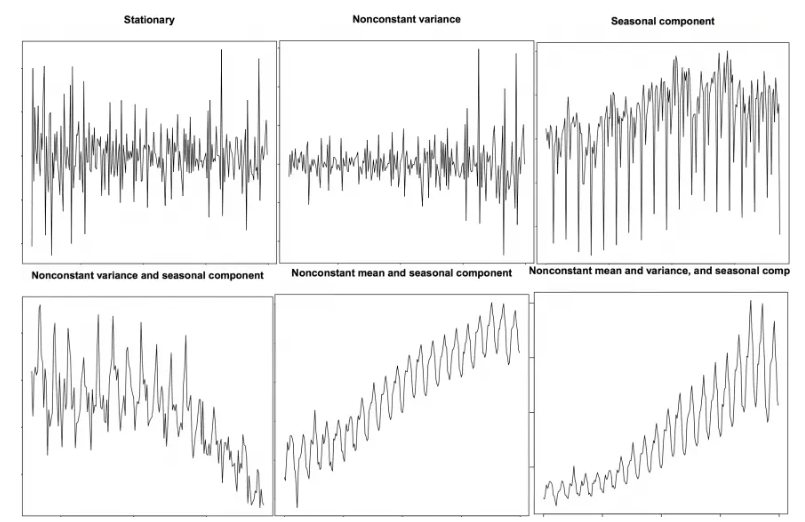

In [142]:
from IPython.display import Image

image_path = 'C:/Users/mgojevic/Desktop/000.png'
Image(filename=image_path)

### Pretvaranje nestacionarnog u stacionaran vremenski niz

Često se zna dogoditi da podaci nisu stacionarni. U skladu s time potrebno je provesti matematičke transformacije kako bi postali. Provesti je moguće operacije poput oduzimanja, množenja, potenciranja, logaritmiranja.

Jedan primjer pretvorbe: Yt,t-1= Yt - Yt-1

Time smo kreirali novi vremenski niz tako da su elementi nastali kombinacijom susjednih elemenata originalnog vremenskog niza.

Zašto raditi pretvorbu?

1. stacionaran niz je lakse analizirati i predviđanja su puno bolja

2. Autoregresivan model AR(p) = model oblika multiple linearne regresije takav da nezavisne varijable sada čine vrijednosti prethodnih opaženih vrijednosti (lagged values) te se one uzivaju kao nezavisne varijable. Zavisna varijabla je varijabla koju želimo procijeniti. Dakle, model izgleda: Y_t=alfa_1*Y_t-1+...alfa_p*Y_t-p + WHITE_NOISE(slučajna greška tj. šum)

Budući da AR(p) koristi linearne modele tako da uzima podatke iz proslosti (lags) vazno nam je da očekivanje bude konstantna vrijednost ma za koji god t i p krenuli u analizu,a to mozemo samo ako je stacionaran.


3. Linearni modeli najbolje funkcioniraju tako  da je uklonjen bilo kakav oblik autokorlacije i korelacije. To je moguce upravo u situaciji kada je zadovoljena stacionarnost jer se onda kreirajo najbolji optimalni model. 

### Provjera stacionarnosti

Metode:

1. vizualno - gledajući u graf

2. podjelom vremenskog niza na više manjih te uspoređivanjem njihovih svojstava: mean, variance, autocorrelation -> ako su brojevi skoro identični dobro je, ali ako su jako različiti nije dobro

3. Provedba testova za utvrđivanje postojanja jediničnog korijena (unit root) - Ako test ukazuje na prisutnost jediničnog korijena, sugerira da je vremenski niz nestacionaran i posjeduje stohastički trend koji ga čini teško modeliranim pomoću tradicionalnih metoda.Testovi jediničnog korijena su bitni u analizi vremenskih nizova jer nam pomažu razumjeti možemo li podatke analizirati pomoću stacionarnih modela ili trebamo primijeniti diferenciranje ili druge transformacije kako bi postigli stacionarnost. Primjer test: ADF TEST


#### Augmented Dickey-Fuller (ADF) test

H0: postoji unit root

  H1: ne H0

Ako je p-vrijednost veća od određene značajnosti (obično 0.05), tada ne odbacujemo nul hipotezu, što ukazuje na prisutnost jediničnog korijena i nestacionarnosti.

In [160]:
#import numpy as np  #ovo smo na pocetku ucitali pa je tu komentar
#import pandas as pd   #ovo smo na pocetku ucitali pa je tu komentar

from statsmodels.tsa.stattools import adfuller


In [166]:

# Perform ADF test
result = adfuller(data['Number of Passengers'])

print(result)

(0.8153688792060511, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


In [168]:
# Interpret results
print("ADF test Statistic:", result[0])
print("p-value:", result[1])
print("Number of lags used:", result[2])
print("Number of observations :", result[3])
print("Critical Values used at the 1,5,10% levels:", result[4])


ADF test Statistic: 0.8153688792060511
p-value: 0.991880243437641
Number of lags used: 13
Number of observations : 130
Critical Values used at the 1,5,10% levels: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


Zaključak: Naši podaci sigurno stacionarni budući je p-value veći od 5%. Nama je 99.2%.

#### Stacionarni niz VS. bijeli šum  (WHITE NOISE)

Zajedničko: Ne ovise o vremenskim periodima već imaju konstatno očekivanje i varijancu
    

Različito: Bijeli šum je sastavljen od niza nasumičnih brojeva s koji ima očekivanje 0, a stacionarnom nizu nije očekivanje 0

In [173]:
#kreiram bijeli šum

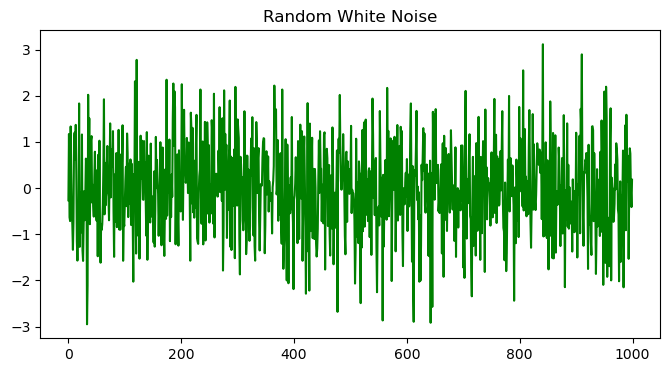

In [210]:
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt

# Generate random white noise data
random_numbers = np.random.randn(1000)
whiteNoise = pd.Series(random_numbers)

# Create the plot
whiteNoise.plot(title='Random White Noise', color='g')

# Display the plot using plt.show()
#plt.rcParams.update({'figure.figsize': (8,4)})
#plt.figure(figsize=(10,9), dpi=100)
plt.show()

# Uklanjanje trenda vremenskom nizu 

### 1. način

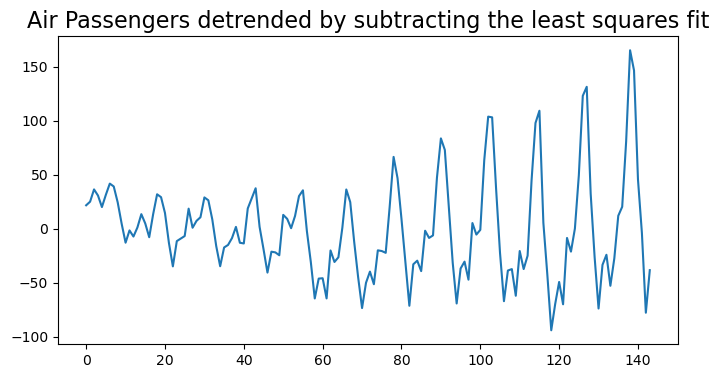

In [222]:
from scipy import signal

detrended = signal.detrend(data['Number of Passengers'].values)

plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the least squares fit', fontsize=16)
plt.show()

### 2. način

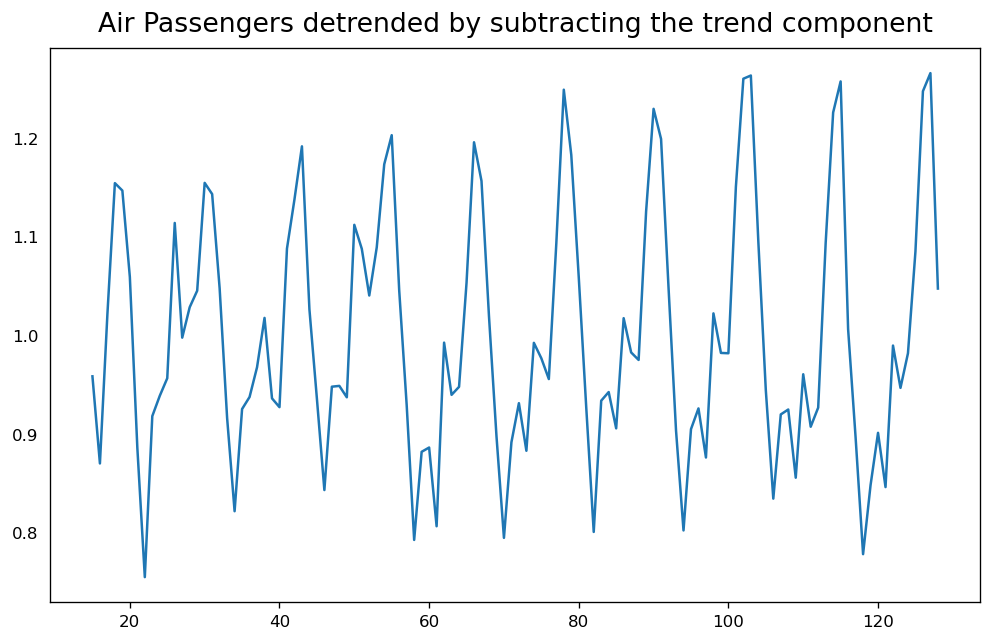

In [245]:
# Using statmodels: Subtracting the Trend Component
from statsmodels.tsa.seasonal import seasonal_decompose

decomp_mul = seasonal_decompose(data['Number of Passengers'], model='multiplicative', period=30)

detrended = data['Number of Passengers'].values / decomp_mul.trend 

plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the trend component', fontsize=16)
plt.show()

# Uklanjanje sezonske komponente vremenskom nizu 

[]

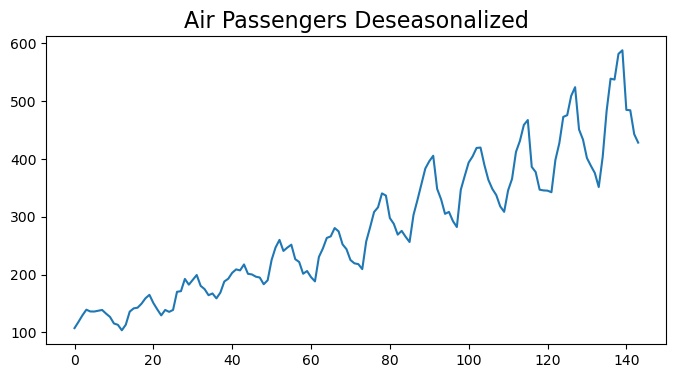

In [225]:
# Subtracting the Trend Component


# Time Series Decomposition
decomp_mul = seasonal_decompose(data['Number of Passengers'], model='multiplicative', period=30)


# Deseasonalize
deseasonalized = data['Number of Passengers'].values / decomp_mul.seasonal


# Plot
plt.plot(deseasonalized)
plt.title('Air Passengers Deseasonalized', fontsize=16)
plt.plot()

# Testiranje sezonalne komponente u vremenskom nizu - ACF i PACF 

Graf autokorelacijske funkcije (ACF) - za određivanje sezonalnosti u vremenskom nizu ima određene uzorke na koje trebate obratiti pažnju kako biste prepoznali moguću sezonalnost.

Uobičajeni način testiranja sezonalnosti vremenskog niza je grafički prikazati niz i provjeriti ponavljajuće uzorke u fiksnim vremenskim intervalima. Dakle, vrste sezonalnosti određuju se prema vremenu na satu ili prema kalendaru.

Sati u danu
Dan u mjesecu
Tjedno
Mjesečno
Godišnje

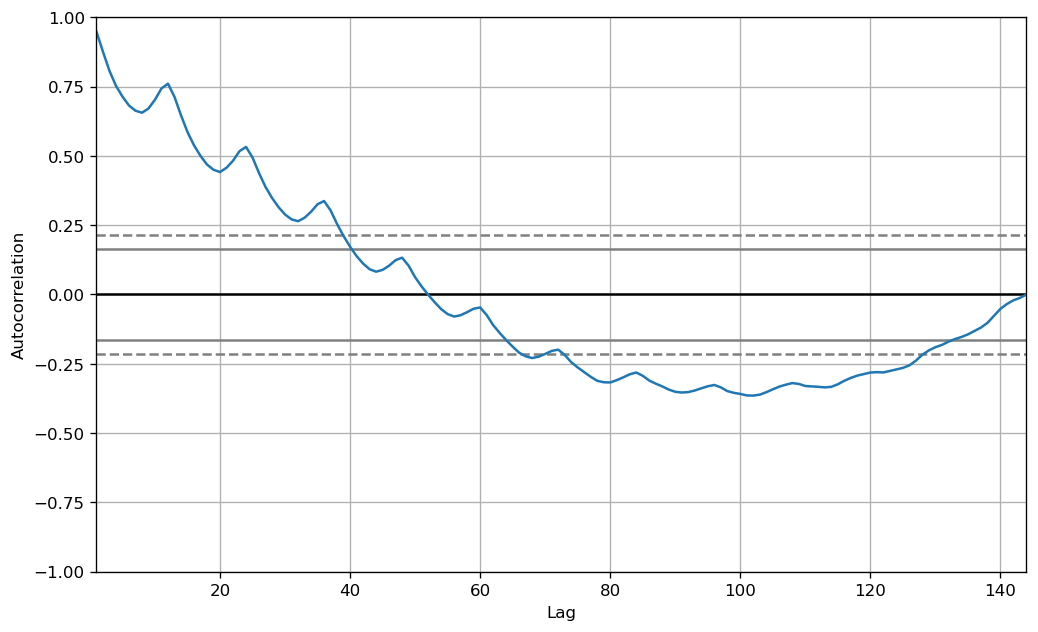

In [227]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(data['Number of Passengers'].tolist())
plt.show()

Autokorelacija je korelacija niza s vlastitim kašnjenjima. Ako je niz značajno autokoreliran, to znači da prethodne vrijednosti niza (kašnjenja) mogu biti korisne u predviđanju trenutne vrijednosti.

In [ ]:
Graf parcijalne autokorelacijske funkcije (PACF)

Parcijalna autokorelacija je korelacija niza s odrđenim kašnjenjem(lagom). Uzima u obzir samo jedan ili neke, a ne sve lagove koji postoje u nizu. To pomaže razumjeti specifični utjecaj pojedinog kašnjenja na trenutnu vrijednost niza, eliminirajući utjecaj drugih kašnjenja.

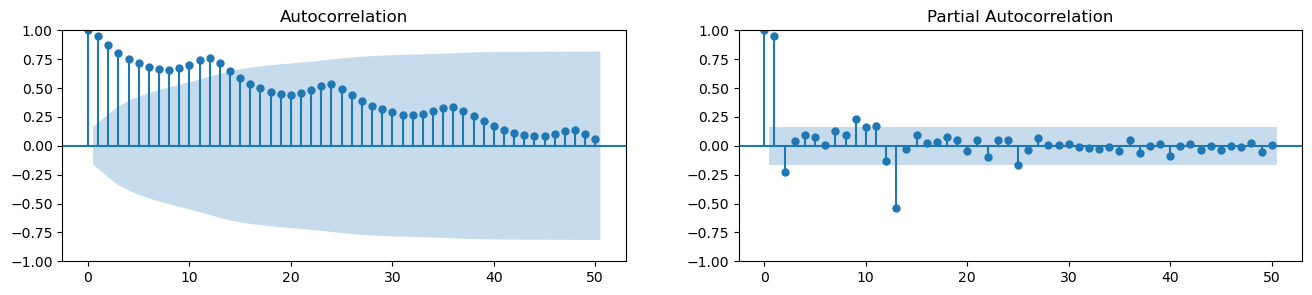

In [241]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)

plot_acf(data['Number of Passengers'].tolist(), lags=50, ax=axes[0])

plot_pacf(data['Number of Passengers'].tolist(), lags=50, ax=axes[1])

plt.show()

## Grafovi zakašnjenja (lag plots) predviđanja budućnosti 

Lag-plot je raspršeni dijagram vremenskog niza u odnosu na njegovo kašnjenje. Obično se koristi za provjeru autokorelacije. Ako postoji bilo kakav obrazac u nizu, niz je autokoreliran. Ako takav obrazac ne postoji, niz vjerojatno predstavlja slučajni bijeli šum.

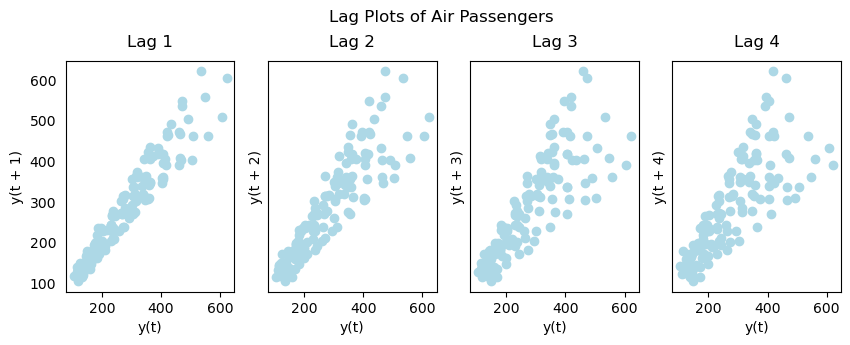

In [243]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)

for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(data['Number of Passengers'], lag=i+1, ax=ax, c='lightblue')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Air Passengers', y=1.05)    
plt.show()

S ovih grafova uocavamo uzaorak. Ukoliko grafovi imaju sličan izgled prema nekoj linarnoj putanji, clusteru ili slično onda mozemo uociti da nam podaci dobor predviđaju. Ovim grafom zapravo odlucujemo provjeriti sto ce se dogoditi u budućnosti ima li nade za nas set podataka. 

# Upute za novo ucitane podatke 

#### 1. Load the Data

Import the time series data into your analysis environment. This could be from a CSV file, database, or other sources.







In [247]:
data=pd.read_csv('C:\\Users\\mgojevic\\Downloads\\archive\\AirPassengers.csv')


#### 2. Check Data Format

Ensure that the data is in a structured format with columns representing time and corresponding values. Common formats include CSV, Excel, or databases.

#### 3. Parse Time Information


If the time information is not in a datetime format, convert it to datetime objects for better handling and analysis.

In [252]:
import pandas as pd

# Create a DataFrame with a column containing date strings (replace this with your data)
data = {'date_column': ['2023-08-01', '2023-08-02', '2023-08-03']}
df = pd.DataFrame(data)

# Convert the 'date_column' to datetime objects
df['date_column'] = pd.to_datetime(df['date_column'])

print(df)

  date_column
0  2023-08-01
1  2023-08-02
2  2023-08-03


#### 4. Handling Missing Values

Identify and analyze missing values in the time series.
Decide how to handle missing data (remove, impute, interpolate) based on the nature of the data and its impact on analysis.


In [253]:
import pandas as pd

# Create a DataFrame (replace this with your data)
data = {'column1': [1, 2, None, 4, 5],
        'column2': [None, 2, 3, 4, None]}
df = pd.DataFrame(data)

# Remove rows with any null values
df_cleaned = df.dropna()

print(df_cleaned)


   column1  column2
1      2.0      2.0
3      4.0      4.0


You can customize the behavior of dropna() using the how and thresh parameters:

how='any' (default): Removes rows with any null values.
how='all': Removes rows only if all values are null.
thresh=n: Removes rows with at least n non-null values.

In [256]:
# Remove rows where all values are null
df_cleaned_all = df.dropna(how='all')

print(df_cleaned_all)



   column1  column2
0      1.0      NaN
1      2.0      2.0
2      NaN      3.0
3      4.0      4.0
4      5.0      NaN


In [260]:
# Remove rows with at least 1 non-null value
df_cleaned_thresh = df.dropna(thresh=2)

print(df_cleaned_thresh)

   column1  column2
1      2.0      2.0
3      4.0      4.0


#### 5. Resampling and Regularization



If the time intervals are irregular, consider resampling the data to regular intervals (e.g., daily, monthly) using methods like forward-fill, backward-fill, or interpolation.
Resampling helps in ensuring uniform intervals for analysis.



In [264]:
#import pandas as pd

# Assume df has a 'datetime_column' and a 'value_column'

# Convert 'datetime_column' to datetime objects (if not already)
##df['datetime_column'] = pd.to_datetime(df['datetime_column'])

# Set the 'datetime_column' as the index (required for resampling)
##df.set_index('datetime_column', inplace=True)

# Resample to daily frequency and use forward-fill to fill missing values
##df_resampled = df.resample('D').ffill()

##print(df_resampled)

The pd.to_datetime() function converts the 'datetime_column' to datetime objects.
The set_index() method sets the 'datetime_column' as the index, which is necessary for resampling.
The resample('D') function resamples the data to a daily frequency.
The .ffill() method uses forward-fill to fill missing values in the resampled data.
You can replace 'D' with other frequencies such as 'M' for monthly or 'A' for annual. You can also use other methods for filling missing values, such as .bfill() for backward-fill or .interpolate() for interpolation

#### 6. Dealing with Outliers


Identify and handle outliers that might affect the analysis.
You can use techniques like median filtering, Z-score, or domain knowledge to address outliers.


#### 7. Data Normalization/Scaling


Normalize or scale the data if necessary to bring values to a similar range.
Some algorithms require normalized data for better convergence.


#### 8. Feature Engineering



Create new features that might be relevant for analysis, such as lagged values, moving averages, or difference calculations.
These features can provide additional insights into the time series patterns.


#### 9. Feature Selection




Select the most relevant features for your analysis. Removing irrelevant features can improve the efficiency of your analysis.


#### 10. Handling Categorical Variables (if any)



Convert categorical variables into numerical format using techniques like one-hot encoding.


#### 11. Splitting Data



Split the dataset into training, validation, and test sets. The training set is used for building the model, the validation set for tuning hyperparameters, and the test set for final evaluation.


#### 12. Data Visualization



Visualize the preprocessed data to check for patterns, trends, and anomalies.


#### 13. Save Preprocessed Data



Save the preprocessed data in a suitable format for further analysis. This avoids the need to repeat the preprocessing steps in the future.
Remember that the specific steps and techniques might vary depending on the nature of the time series data and the objectives of your analysis. Always ensure that your data is prepared in a way that supports accurate and meaningful analysis.

# Modeli vremenskih nizova

## AR(p), MA(q), ARIMA(p,d,q)


#### AR(P) - Autoregresivni Model (AR):

AR model je komponenta ARIMA modela i označava "autoregresivni" model. U ovom modelu koristimo prošle vrednosti vremenskog niza kako bismo predvidjeli buduće vrednosti. Parametar P označava koliko prošlih vrednosti koristimo za predviđanje. Na primjer, AR(1) koristi samo posljednju vrednost, dok AR(2) koristi posljednje dvije vrednosti.

#### MA(Q) - Model Pomičnog Proseka (MA):


MA model je također komponenta ARIMA modela i označava "model pomičnog proseka". Ovaj model koristi prethodne greške predviđanja kako bi predvidio buduće vrednosti. Parametar Q označava koliko prethodnih grešaka uzimamo u obzir za predviđanje. Na primjer, MA(1) koristi samo posljednju grešku, dok MA(2) koristi posljednje dvije greške.

#### ARIMA(P, D, Q) - Autoregresivni Integrisani Model Pomičnog Proseka:

ARIMA model je kombinacija AR i MA modela sa komponentom "integrisani" (I), koja se koristi za postizanje stacionarnosti vremenskog niza. Parametri P, D i Q se koriste za podešavanje broja autoregresivnih, integrisanih i modela pomičnog proseka u modelu.

Parametar P označava red autoregresije (koliko prethodnih vrednosti koristimo za predviđanje).
Parametar D označava broj integrisanja (koliko puta primenjujemo diferenciranje na vremenski niz kako bismo ga učinili stacionarnim).
Parametar Q označava red modela pomičnog proseka (koliko prethodnih grešaka koristimo za predviđanje).
Kombinacijom ovih komponenata, ARIMA model omogućava modeliranje različitih karakteristika vremenskih serija i predviđanje budućih vrednosti na temelju njihove prošle dinamike.

#### Koraci do provedbe forcasting modela

In [273]:
#pip install statsmodels


In [281]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error



In [294]:
# Load your time series data into a DataFrame (replace 'data.csv' with your file)
#data=pd.read_csv('blabla.csv')


Prepare your data:
Convert the date column to datetime objects.
Set the date column as the index.
Optionally, handle missing values.

In [292]:
#data['date_column'] = pd.to_datetime(data['date_column'])
#data.set_index('date_column', inplace=True)


Split your data into training and test sets:

In [279]:
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]


Create and fit the AR model:

In [287]:
#AR

#model = AutoReg(train, lags=1)  # Specify the number of lags
#model_fit = model.fit()

#MA

#model = ARIMA(train, order=(0, 0, 1))  # (p, d, q) = (0, 0, 1) for MA(1)
#model_fit = model.fit(disp=0)  # Set disp=0 to suppress convergence information

#ARIMA

p, d, q = 1, 1, 1  # Specify values for p, d, and q (order of ARIMA)
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit(disp=0)  # Set disp=0 to suppress convergence information


Make predictions using the trained model:

In [288]:
#predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)


Evaluate the model:

In [290]:
#mse = mean_squared_error(test, predictions)
#print(f"Mean Squared Error: {mse}")


Visualize the results:

In [291]:
#plt.plot(test.index, test, label='Actual')
#plt.plot(test.index, predictions, color='red', label='Predicted')
#plt.legend()
#plt.show()
